In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmath
from collections.abc import Sequence

Load data

In [2]:
# Load the data:
data= pd.read_csv('adult.data')
data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### H1 Histogram of Education level

In [3]:
# Load the Education donner
df_education = data[['Education',' Education-num']]
df_education

,Education,Education-num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
...,...,...
32556,Assoc-acdm,12
32557,HS-grad,9
32558,HS-grad,9
32559,HS-grad,9


In [4]:
df_education_num = df_education[' Education-num']
df_education_num

0        13
1        13
2         9
3         7
4        13
         ..
32556    12
32557     9
32558     9
32559     9
32560     9
Name:  Education-num, Length: 32561, dtype: int64

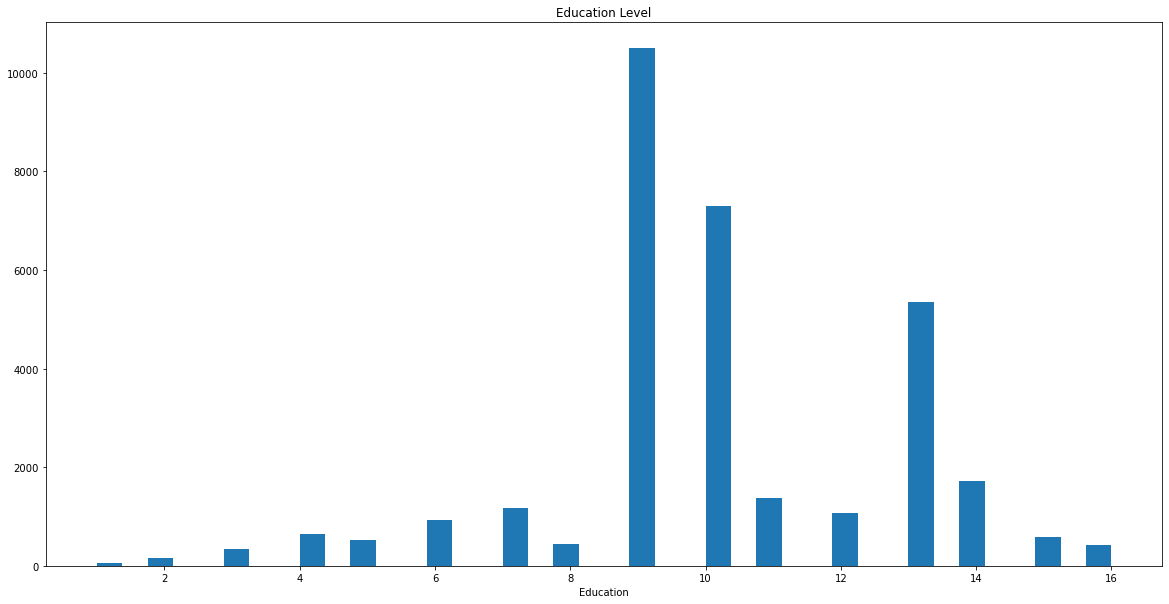

In [5]:
plt.figure(figsize=(20,10))
plt.hist(df_education_num, bins=40)
plt.gca().set(title='Education Level', xlabel='Education');

### H2 Histogram of working hours per week for people with income over 50K

In [6]:
df_hours_per_week = data[['Hours-per-week','Income']] 
df_hours_per_week

,Hours-per-week,Income
0,40,<=50K
1,13,<=50K
2,40,<=50K
3,40,<=50K
4,40,<=50K
...,...,...
32556,38,<=50K
32557,40,>50K
32558,40,<=50K
32559,20,<=50K


In [7]:
df_income_over_50k = pd.DataFrame(df_hours_per_week)
df_income_over_50k = df_income_over_50k[df_income_over_50k['Income'] == ' >50K']
df_income_over_50k

,Hours-per-week,Income
7,45,>50K
8,50,>50K
9,40,>50K
10,80,>50K
11,40,>50K
...,...,...
32539,10,>50K
32545,20,>50K
32554,40,>50K
32557,40,>50K


In [8]:
df_income_over_50k = df_income_over_50k['Hours-per-week']
df_income_over_50k

7        45
8        50
9        40
10       80
11       40
         ..
32539    10
32545    20
32554    40
32557    40
32560    40
Name: Hours-per-week, Length: 7841, dtype: int64

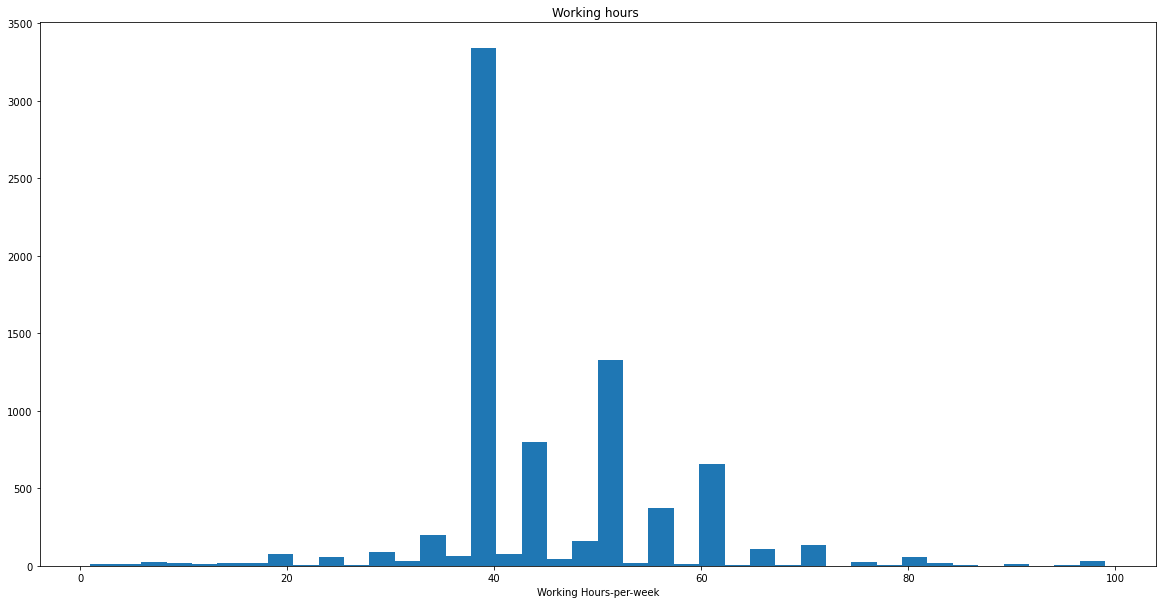

In [9]:
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k, bins=40)
plt.gca().set(title='Working hours ', xlabel='Working Hours-per-week');

### Laplace Mechanism for Histograms

### Q1 
La sensivity est 1 car il s'agit du nombre d'individu dans l'histogramme

### Q2 : Use mechanism Laplace to compute query H1 with {0.01, 0.1, 1}

In [10]:
sensitivity = 1
epsilon = 0.01

df_education_num_001 = df_education_num + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_education_num_001.head(10)

0    35.965999
1    35.965999
2    31.965999
3    29.965999
4    35.965999
5    36.965999
6    27.965999
7    31.965999
8    36.965999
9    35.965999
Name:  Education-num, dtype: float64

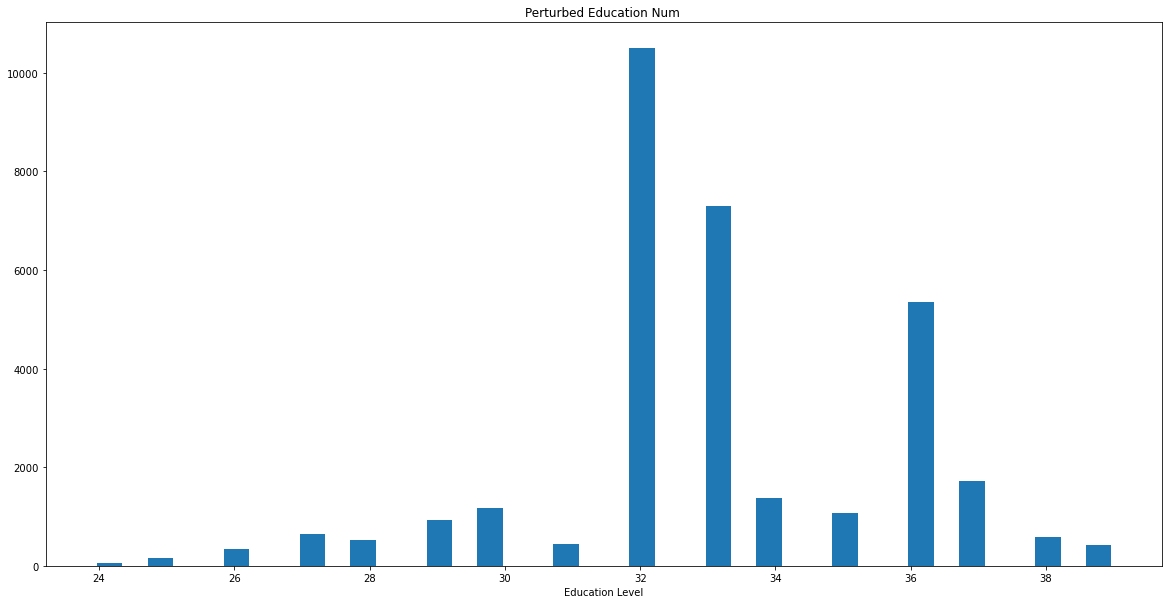

In [11]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_001, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [12]:
sensitivity = 1
epsilon = 0.1

df_education_num_01 = df_education_num + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_education_num_01.head(20)

0     13.994154
1     13.994154
2      9.994154
3      7.994154
4     13.994154
5     14.994154
6      5.994154
7      9.994154
8     14.994154
9     13.994154
10    10.994154
11    13.994154
12    13.994154
13    12.994154
14    11.994154
15     4.994154
16     9.994154
17     9.994154
18     7.994154
19    14.994154
Name:  Education-num, dtype: float64

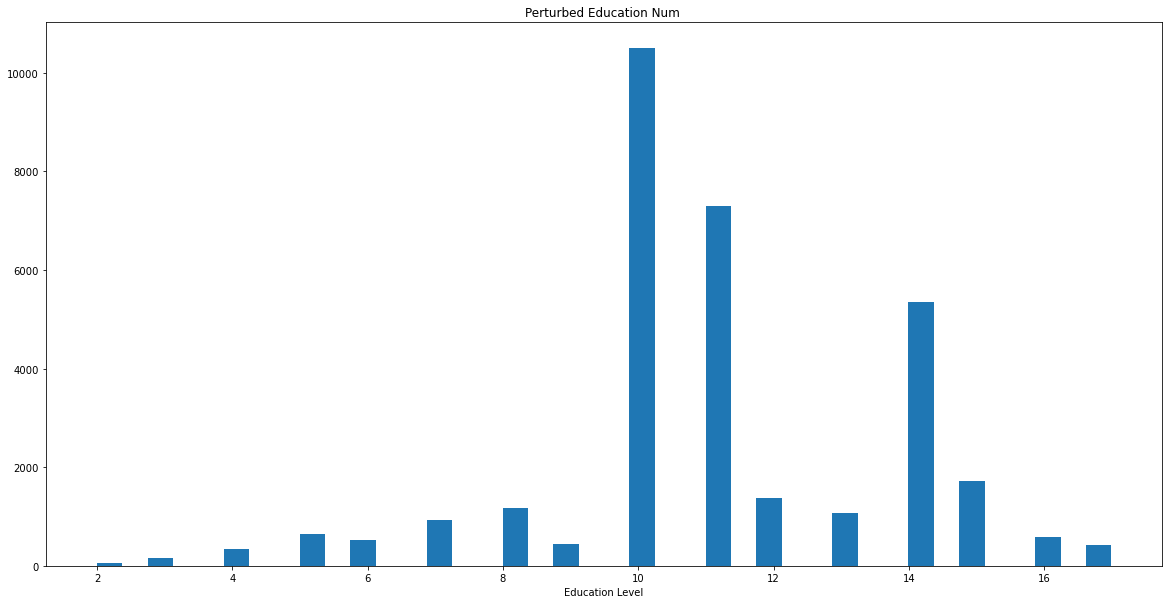

In [13]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_01, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [14]:
sensitivity = 1
epsilon = 1

df_education_num_1 = df_education_num + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_education_num_1.head(20)

0     12.479733
1     12.479733
2      8.479733
3      6.479733
4     12.479733
5     13.479733
6      4.479733
7      8.479733
8     13.479733
9     12.479733
10     9.479733
11    12.479733
12    12.479733
13    11.479733
14    10.479733
15     3.479733
16     8.479733
17     8.479733
18     6.479733
19    13.479733
Name:  Education-num, dtype: float64

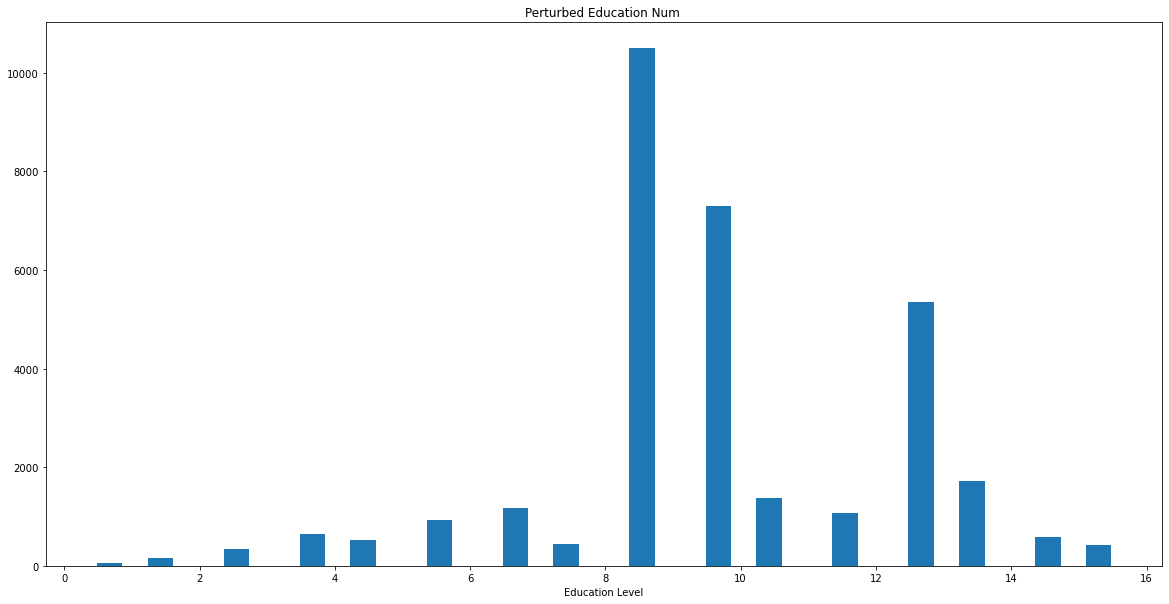

In [15]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_1, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

#### On constate qu'il n'y a pas de différence entre  les histogrammes des données non-pertubées et ceux des données pertubées

### Q3 1- :  Use mechanism Laplace to compute query H2 with {0.01, 0.1, 1}

In [16]:
## trouvons la sensitivity de la requête H2 : ici il s'agit d'une SUM
sensitivity_h2 = np.amax(df_income_over_50k) 
sensitivity_h2

99

In [17]:
epsilon = 0.01

df_income_over_50k_001 = df_income_over_50k + np.random.laplace(loc=0, scale=sensitivity_h2 /epsilon)
df_income_over_50k_001.head(20)

7    -1422.880387
8    -1417.880387
9    -1427.880387
10   -1387.880387
11   -1427.880387
14   -1427.880387
19   -1422.880387
20   -1407.880387
25   -1427.880387
27   -1407.880387
38   -1429.880387
45   -1427.880387
52   -1407.880387
53   -1412.880387
55   -1427.880387
63   -1422.880387
67   -1427.880387
68   -1417.880387
72   -1397.880387
84   -1427.880387
Name: Hours-per-week, dtype: float64

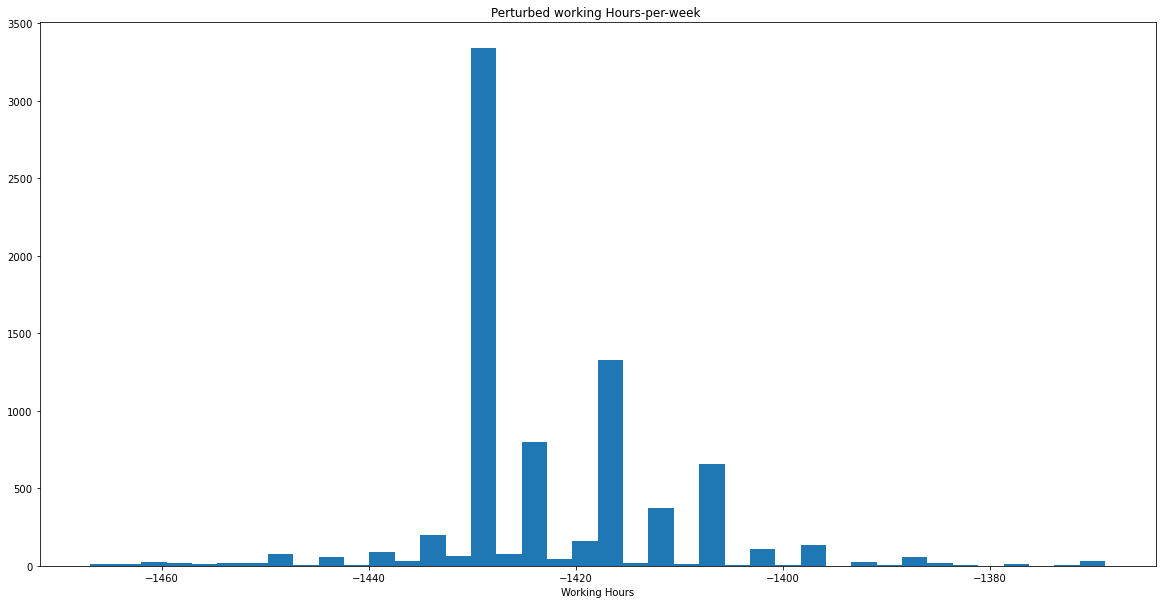

In [18]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_001, bins=40)
plt.gca().set(title='Perturbed working Hours-per-week ', xlabel='Working Hours');

In [19]:
epsilon = 0.1

df_income_over_50k_01 = df_income_over_50k + np.random.laplace(loc=0, scale=sensitivity_h2 /epsilon)
df_income_over_50k_01.head(20)

7    -77.618229
8    -72.618229
9    -82.618229
10   -42.618229
11   -82.618229
14   -82.618229
19   -77.618229
20   -62.618229
25   -82.618229
27   -62.618229
38   -84.618229
45   -82.618229
52   -62.618229
53   -67.618229
55   -82.618229
63   -77.618229
67   -82.618229
68   -72.618229
72   -52.618229
84   -82.618229
Name: Hours-per-week, dtype: float64

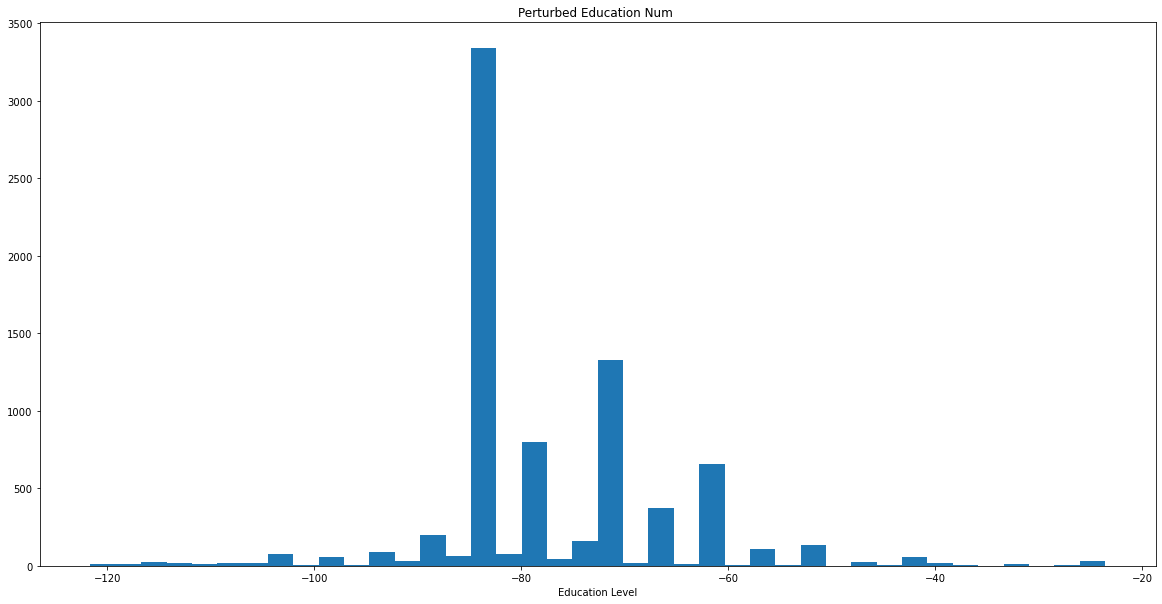

In [20]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_01, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [21]:
epsilon = 1

df_income_over_50k_1 = df_income_over_50k + np.random.laplace(loc=0, scale=sensitivity_h2 /epsilon)
df_income_over_50k_1.head(20)

7     180.41584
8     185.41584
9     175.41584
10    215.41584
11    175.41584
14    175.41584
19    180.41584
20    195.41584
25    175.41584
27    195.41584
38    173.41584
45    175.41584
52    195.41584
53    190.41584
55    175.41584
63    180.41584
67    175.41584
68    185.41584
72    205.41584
84    175.41584
Name: Hours-per-week, dtype: float64

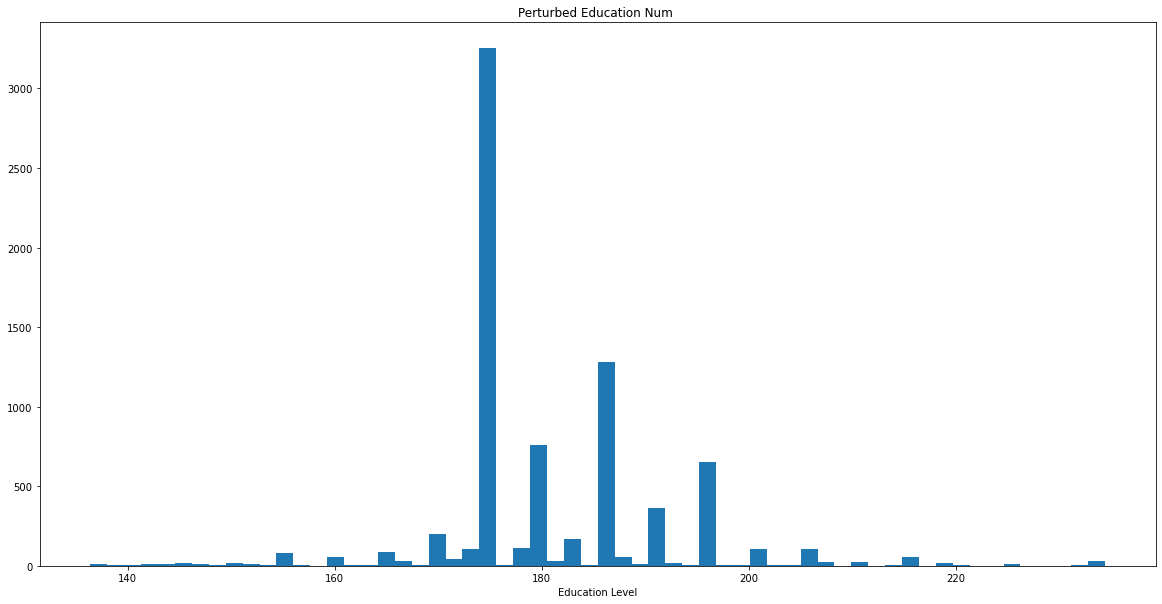

In [22]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_1, bins=60)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

#### L'augmentation du bins n'a pas d'effet sur l'histogramme( voir ci-dessus)

# 2. Basic Fourier Perturbation Algorithm

#### Q4.Implemention of the Basic FPA algorithm

In [23]:
#fonction de calcul de la transformée de fourier
def dft(input, kvalues):
    n = len(input)
    output = []
    for k in range(kvalues):  # Pour chaque élément de la sortie
        s = complex(0)
        for t in range(n):  # Pour chaque élément de l'entrée
            angle = 2j * cmath.pi * t * k / n
            s += input[t] * cmath.exp(-angle)
        output.append(s)
    return output

In [33]:
#Permet d'ajouter du bruit aux coefficients de Fourier en utilisant Laplace
def lpa(input, k, scale):
    output = []
    for coef in dft(input, k):
        output.append(coef + np.random.laplace(loc=0, scale=scale))
    
    return output

In [25]:
#implementation de shape car avec le shape fourni par numpy on a pas la même liste à la sortie
def get_shape(lst, shape=()):
    """
    returns the shape of nested lists similarly to numpy's shape.

    :param lst: the nested list
    :param shape: the shape up to the current recursion depth
    :return: the shape including the current depth
            (finally this will be the full depth)
    """

    if not isinstance(lst, Sequence):
        # base case
        return shape

    # peek ahead and assure all lists in the next depth
    # have the same length
    if isinstance(lst[0], Sequence):
        l = len(lst[0])
        if not all(len(item) == l for item in lst):
            msg = 'not all lists have the same length'
            raise ValueError(msg)

    shape += (len(lst), )
    
    # recurse
    shape = get_shape(lst[0], shape)

    return shape

In [26]:
#Transformée de Fourier inverse
def idft(input, kvalues):
    output = []
    N = get_shape(input)[0]
    n = np.arange(N)
    for k in range(kvalues):
        M = np.exp(2j * np.pi * k * n / N)
        output.append(1 / N * np.dot(M, input))
    return output

In [27]:
x = np.random.random(1024)
x

array([0.83368178, 0.22329451, 0.11678014, ..., 0.52068296, 0.6222022 ,
       0.95149584])

In [28]:
#Test de transformer de Fourier
a = dft(x, 5)
a

[(513.16771593036+0j),
 (11.687736953384414-0.5327063504475702j),
 (7.236509067756412-7.88551826842844j),
 (0.33334595367267195+2.401085568369728j),
 (15.379975384589361+1.1513037553891692j)]

In [29]:
#Test de la fonction idft
i =idft(a, 5)
i

[(109.56105665795258-0.9731670590234226j),
 (104.61117210009277+1.0348412845142627j),
 (96.96307703841035-2.186156056521052j),
 (100.48039916025488+1.3080605676819284j),
 (101.55201097364954+0.8164212633482855j)]

In [36]:
#test de la fonction lpa
t = lpa(x, 5, 1 / 0.01)
t

[(590.9811024102576+0j),
 (29.992778919252572-0.5327063504475702j),
 (12.26084952720764-7.88551826842844j),
 (-33.77916080690282+2.401085568369728j),
 (-358.55093110640854+1.1513037553891692j)]

In [39]:
#Implémentation de la fonction Basic Fourier Perturbation Algorithm
def bfpa(input, k, scale):
    return idft(lpa(input, k, scale), k)

In [42]:
ff = bfpa(x, 5,  (1 / 0.01))
ff

[(150.92913689444018-0.9731670590234226j),
 (143.57727869431523+47.538112472861854j),
 (101.04490736659369+9.008525672847467j),
 (104.56222948843822-9.88662116168659j),
 (140.518117567872-45.68684992499931j)]

In [ ]:
coefficient_education = dft(df_education_num.values, 5)
coefficient_education

#### Q5. Use Basic FPA to compute query H1

In [49]:
sensitivity = 1
epsilon = 1

coefficient_education_001 = bfpa(df_education_num, 5,  sensitivity/ epsilon)
coefficient_education_001

[(65810.30816111308-28.697815398223437j),
 (65577.49976832591-125.17321012531721j),
 (65743.46972529867-81.76295725387253j),
 (65471.26381939702+113.19331664698892j),
 (65635.913594028+122.44066613042429j)]

C:\Users\amad1\Documents\M1_Miage\anaconda\lib\site-packages\numpy\lib\histograms.py:851: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
C:\Users\amad1\Documents\M1_Miage\anaconda\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\amad1\Documents\M1_Miage\anaconda\lib\site-packages\matplotlib\transforms.py:1966: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


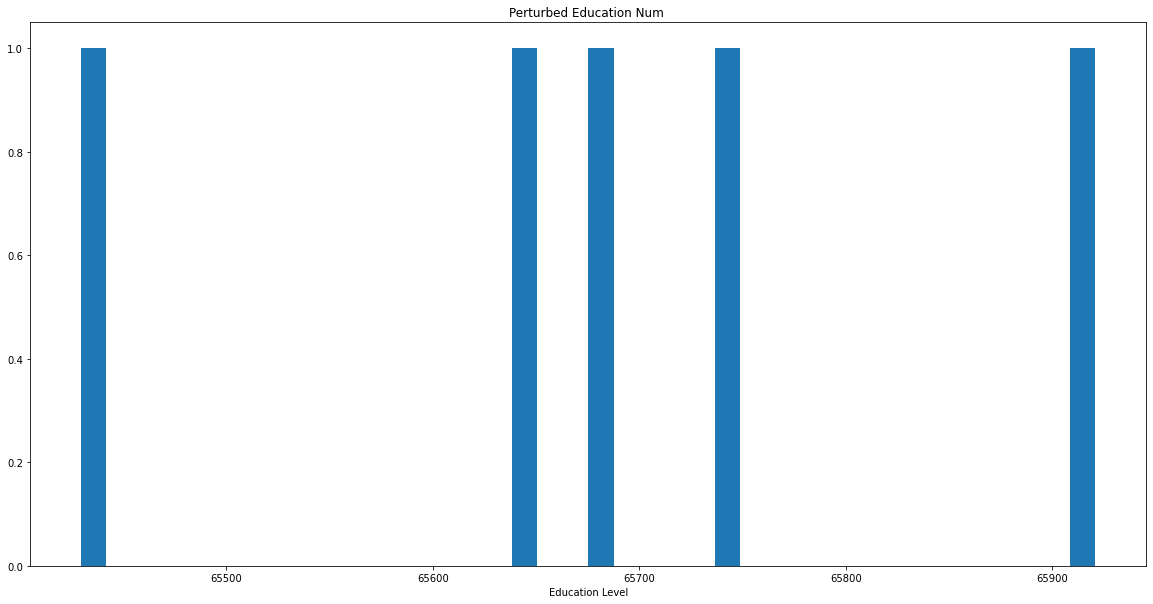

In [47]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(coefficient_education_001, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [ ]:
#Epsilon = 0.1
sensitivity = 1
epsilon = 0.1

df_education_num_01 = df_education_num + np.random.laplace(loc=coefficient_education, scale=sensitivity/epsilon)
df_education_num_01.head(10)

In [ ]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_01, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [ ]:
#Epsilon = 1
sensitivity = 1
epsilon = 1

df_education_num_1 = df_education_num + np.random.laplace(loc=coefficient_education, scale=sensitivity/epsilon)
df_education_num_1.head(10)

In [ ]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_1, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

#### On constate qu'il n'y a pas de différence entre  les histogrammes des données non-pertubées et ceux des données pertubées

In [ ]:
#### Q6. Use Basic FPA to compute query H2

In [ ]:
coefficient_working_per_week = bfpa(df_education_num.values, k = 5)
coefficient_working_per_week

In [ ]:
sensitivity = 1
epsilon = 0.01

df_income_over_50k_001 = df_income_over_50k + np.random.laplace(loc=coefficient_working_per_week, scale=sensitivity/epsilon)
df_income_over_50k_001.head(10)

In [ ]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_001, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [ ]:
sensitivity = 1
epsilon = 0.1

df_income_over_50k_01 = df_income_over_50k + np.random.laplace(loc=coefficient_working_per_week, scale=sensitivity/epsilon)
df_income_over_50k_01.head(10)

In [ ]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_01, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [ ]:
sensitivity = 1
epsilon = 1

df_income_over_50k_1 = df_income_over_50k + np.random.laplace(loc=coefficient_working_per_week, scale=sensitivity/epsilon)
df_income_over_50k_1.head(10)

In [ ]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_1, bins=80)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

#### L'augmentation du bins diminue la largeur des barres de l'histogramme (voir l'histogramme ci-dessus)